<CENTER>
</br>
<p><font size="5">  SAGAR Hedi   </font></p>
<p><font size="5"> Study of Decision Trees </font></p>
</p>
</CENTER>

In [8]:
# Import classic libraries (Matplotlib and PyLab)
%matplotlib inline
%pylab inline

# Import scikit-learn functions
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import log_loss

# Import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

# Figure size
pylab.rcParams['figure.figsize'] = (16, 9)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'y')

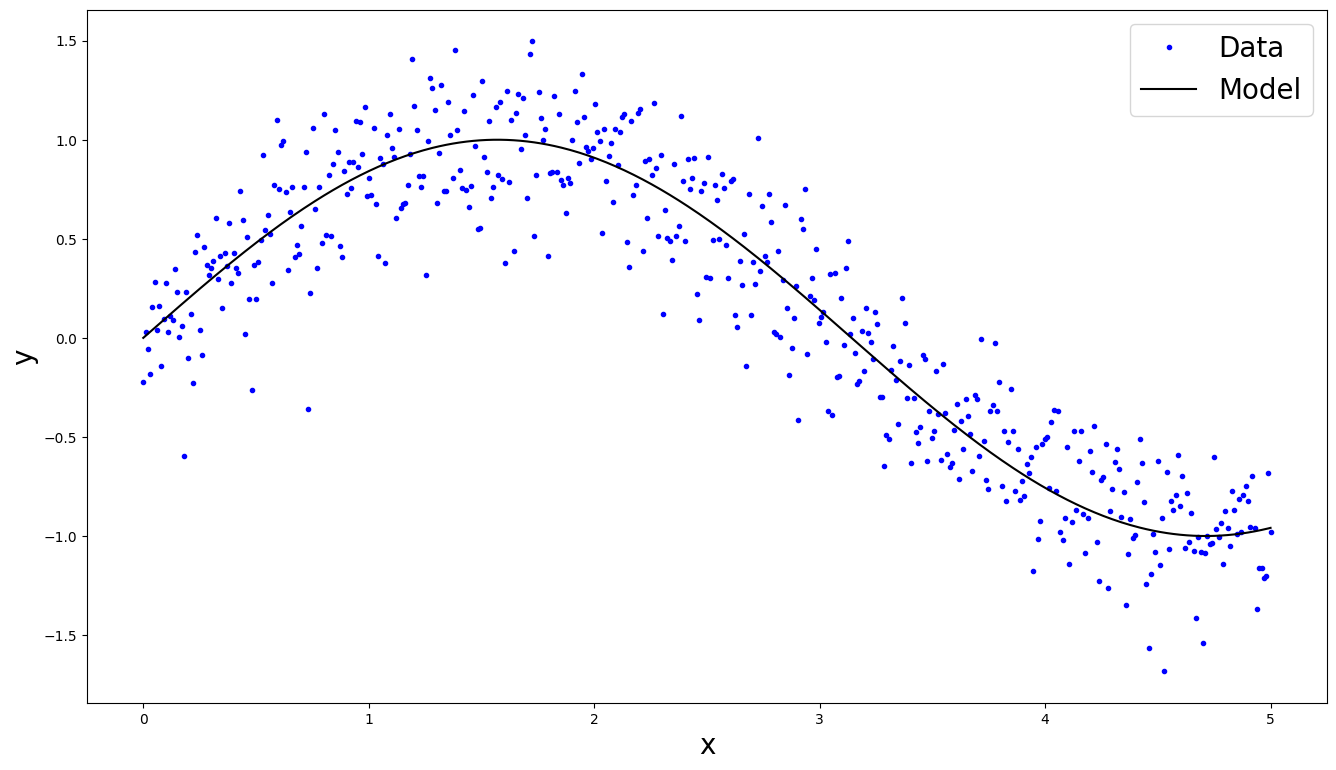

In [27]:
# 1. Generate x and y (adding an additive random noise of mean=0 and std=0.25 on y)

# Data generation
random.seed(1) # setting seed for reproducability
n = 500 # number of samples
μ = 0
σ = 0.25
x = np.array([np.linspace(0, 5, n)]).T
ε = np.random.normal(μ,σ,size=(n,1))
y = np.sin(x) + ε

# Plot
line1, = plt.plot(x, y, '.b')
line2, = plt.plot(x, np.sin(x), '-k')
plt.legend([line1, line2], ['Data', 'Model'], prop={'size': 20})
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

Text(0, 0.5, 'y')

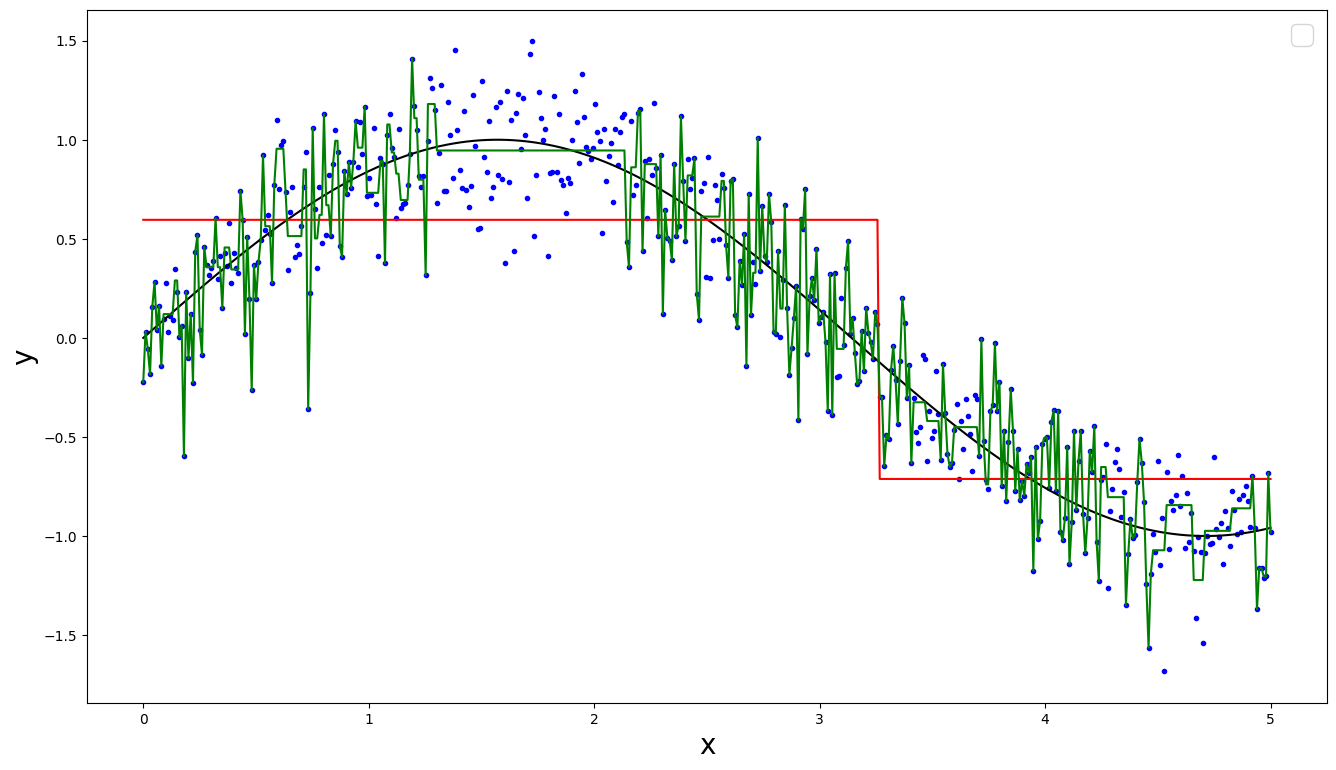

In [28]:
# 2. Apply a single regression tree with depth=1,...,10

# Build the tree (with depth=1)
reg_tree_example_1 = DecisionTreeRegressor(max_depth=1)
reg_tree_example_1.fit(x, y)
y_tree_example_1 = reg_tree_example_1.predict(x)

# Build the trees (with depth=10)
reg_tree_example_10 = DecisionTreeRegressor(max_depth=10)
reg_tree_example_10.fit(x, y)
y_tree_example_10 = reg_tree_example_10.predict(x)

# plt.plot
line1 = plt.plot(x, y, '.b')
line2 = plt.plot(x, np.sin(x), '-k')
line3 = plt.plot(x, y_tree_example_1, '-r')
line4 = plt.plot(x, y_tree_example_10, '-g')
plt.legend([line1, line2, line3, line4], ['Data', 'Model', 'Regression tree (depth=1)', 'Regression tree (depth=10)'], prop={'size': 20})
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

Text(0, 0.5, 'RMSE')

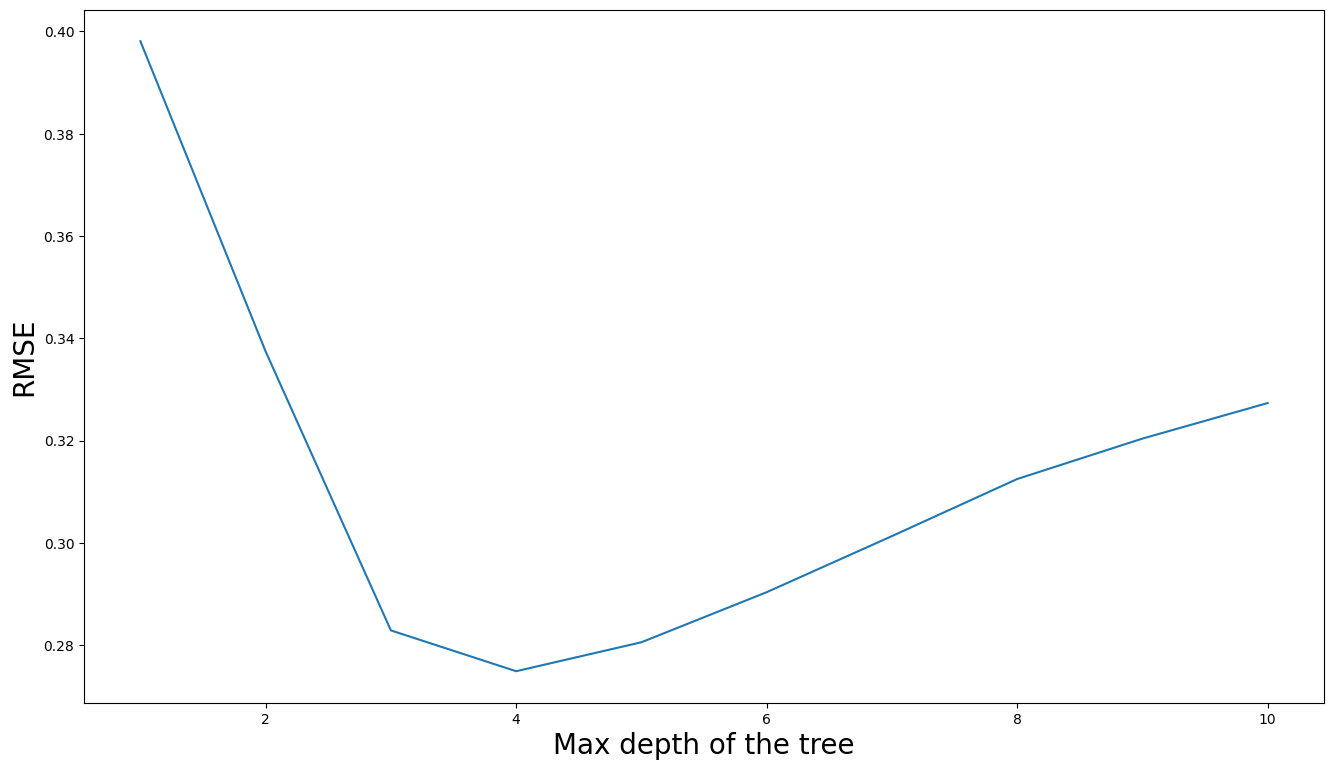

In [43]:
# 3. Optimize the depth of the tree using cross-validation

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits=1000,test_size=1/3,train_size=2/3)

# Define the max depths between 1 and 10
n_depths = 10
depths = np.linspace(1, 10, n_depths,dtype=int)

# Loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = np.zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeRegressor(max_depth=depths[i])
    tab_RMSE_tree[i] = np.median(np.sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))

# Plot
plt.plot(depths, tab_RMSE_tree)
plt.xlabel('Max depth of the tree', size=20)
plt.ylabel('RMSE', size=20)

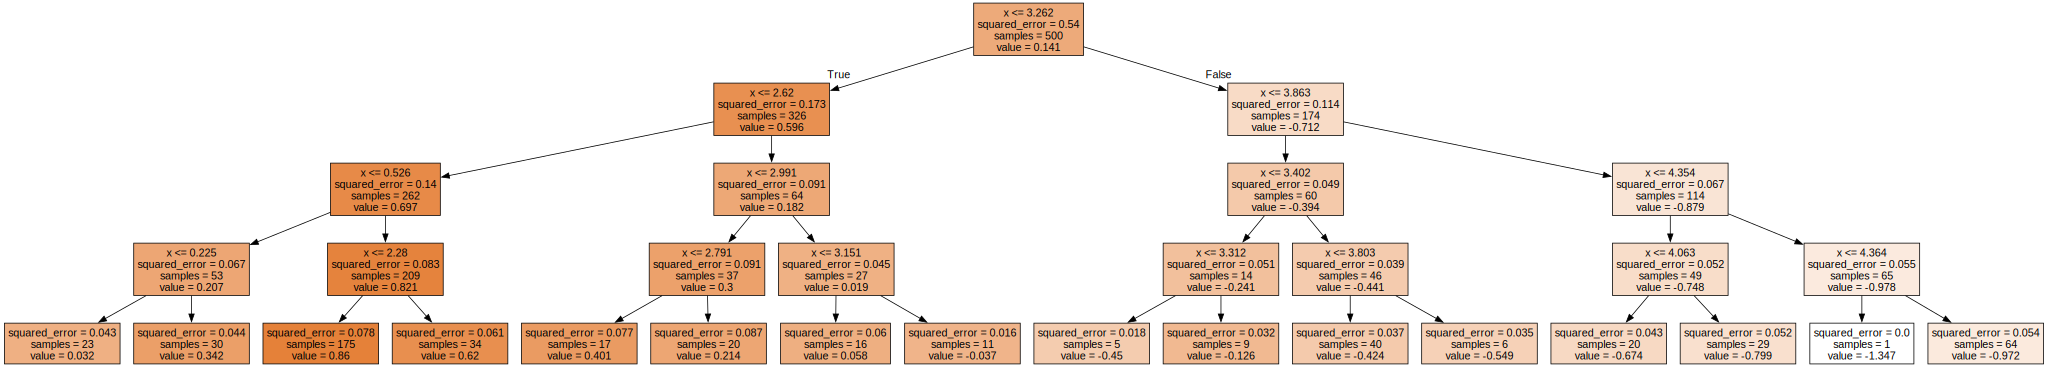

In [52]:
# 4. Compute and plot the tree with the optimal depth
indice_min = np.argmin(tab_RMSE_tree)

# Adjust regression tree with optimal depth
reg_tree = DecisionTreeRegressor(max_depth=depths[indice_min])
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

# Export the tree to "plot_tree.pdf"
plot_tree = export_graphviz(reg_tree, out_file=None, feature_names=['x'], filled=True) 
graph = Source(plot_tree) 
graph.render("reg_tree")

# Plot the tree
graph

Text(0, 0.5, 'y')

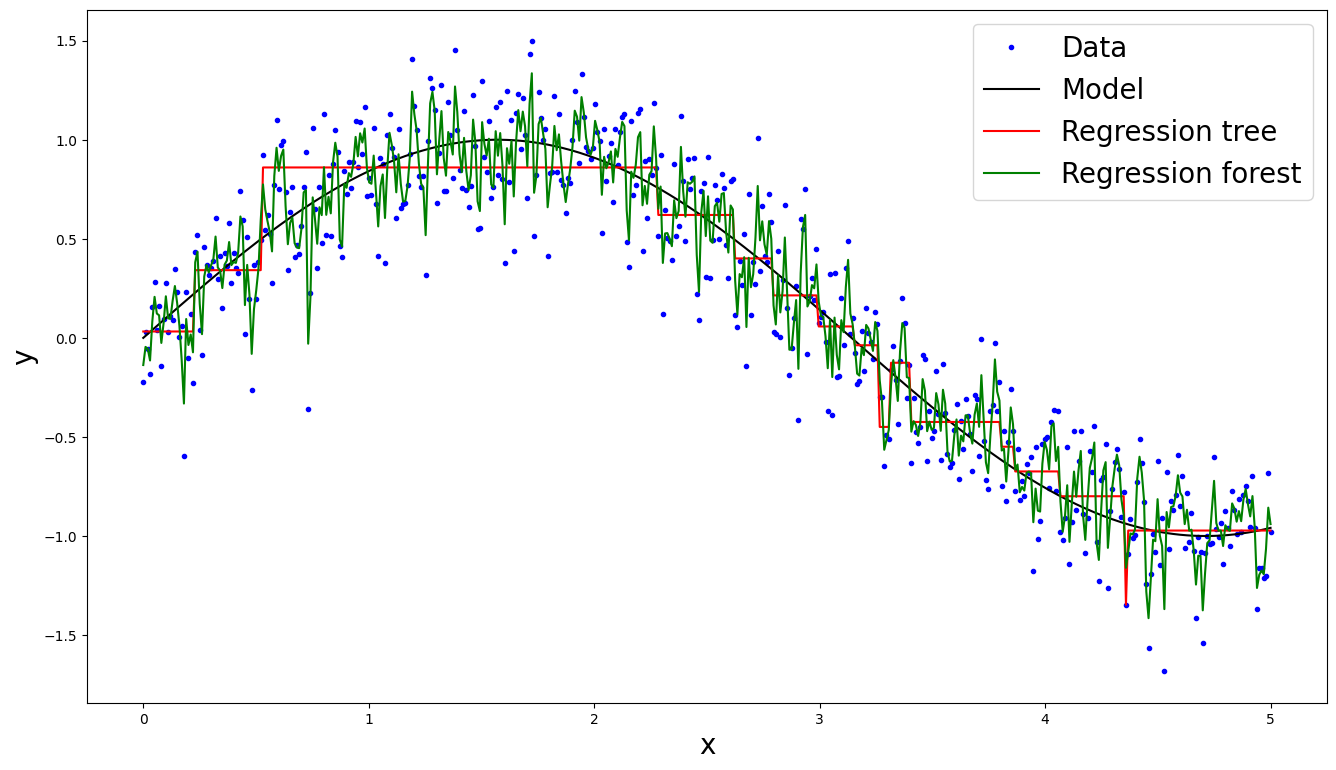

In [53]:
# 5. Implement a regression forest with the optimal depth

# Adjust regression forest using 1000 trees
reg_forest = RandomForestRegressor(n_estimators=100)
reg_forest.fit(x, y)
y_forest = reg_forest.predict(x)

# Plot
line1, = plt.plot(x, y, '.b')
line2, = plt.plot(x, np.sin(x), '-k')
line3, = plt.plot(x, y_tree, '-r')
line4, = plt.plot(x, y_forest, '-g')
plt.legend([line1, line2, line3, line4], ['Data', 'Model', 'Regression tree', 'Regression forest'], prop={'size': 20})
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

## II - Single tree for binary classification

Here, we use a binary classification on the Titanic historical dataset. The goal is to understand the rules infered by the classification tree to predict the output variable (i.e., did people died or survived).

In [54]:
# Import dataset
data_titanic = pd.read_csv('titanic.csv')

# Read X and y
X = data_titanic.drop(['Survived'], axis=1).values
y = data_titanic['Survived'].values
y = (y>0.5) # transform to binary data

Here are some details about the dataset:
- Survived (False --> no, True --> yes)
- Pclass (1 --> 1st class, 2 --> 2nd class, 3 --> 3rd class)
- Sex (0 --> female, 1 --> male)
- Age (0 --> less than 16, 1 --> between 16 and 32, 2 --> between 32 and 48, 3 --> between 48 and 64, 4 --> more than 64)
- FamilySize (number of members in the family)
- Title (1 --> Mr, 2 --> Master, 3 --> Mrs, 4 --> Miss, 5 --> rare)

Text(0, 0.5, 'Cross entropy loss')

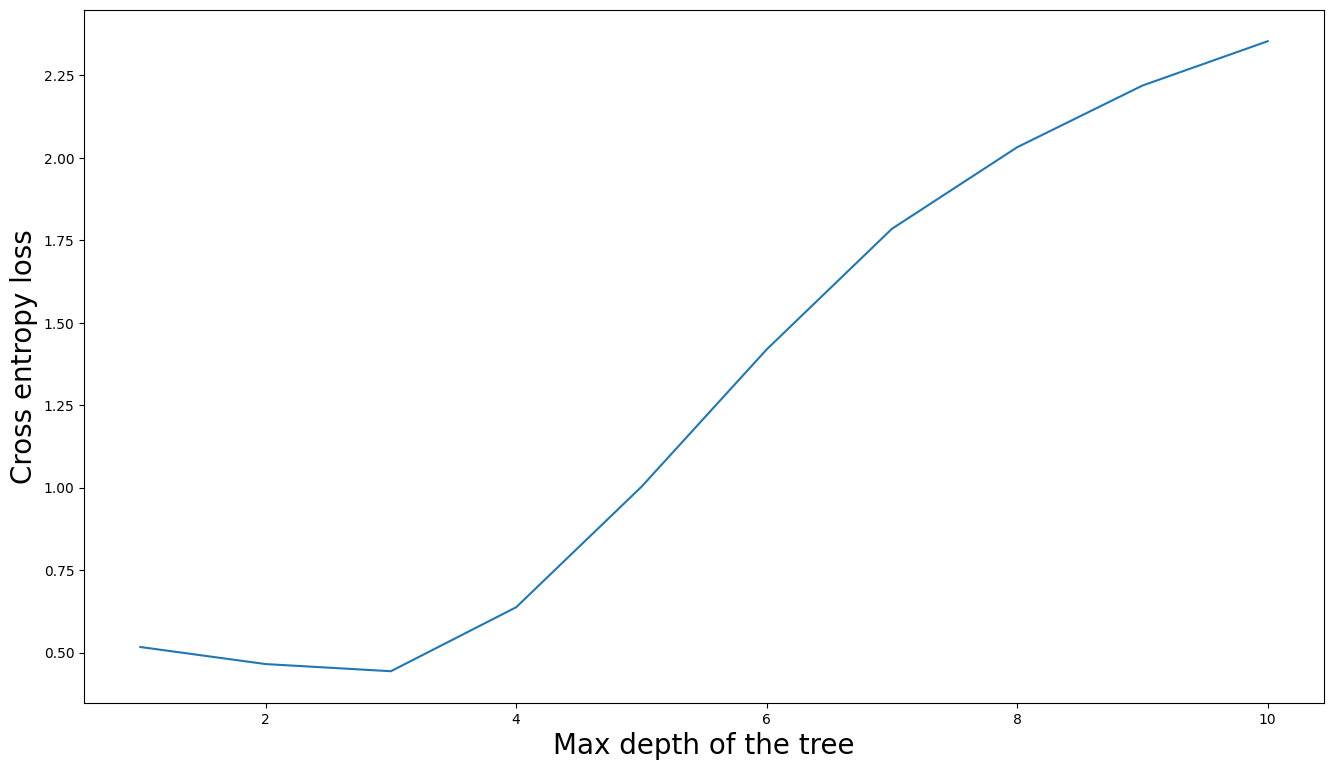

In [60]:

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits=1000,test_size=1/3,train_size=2/3)

# Define the max depths between 1 and 10
n_depths = 10
depths_2 = np.linspace(1, 10, n_depths,dtype=int)

# Loop on the max_depth parameter and compute median Cross Entropy loss
tab_CrossEntropy_loss = np.zeros(n_depths)

for i in range(n_depths):
    class_tree = DecisionTreeClassifier(max_depth=depths_2[i])
    tab_CrossEntropy_loss[i] = np.median(-cross_val_score(class_tree, X, y, scoring='neg_log_loss', cv=cvp))

# Plot
plt.plot(depths_2, tab_CrossEntropy_loss)
plt.xlabel('Max depth of the tree', size=20)
plt.ylabel('Cross entropy loss', size=20)

2


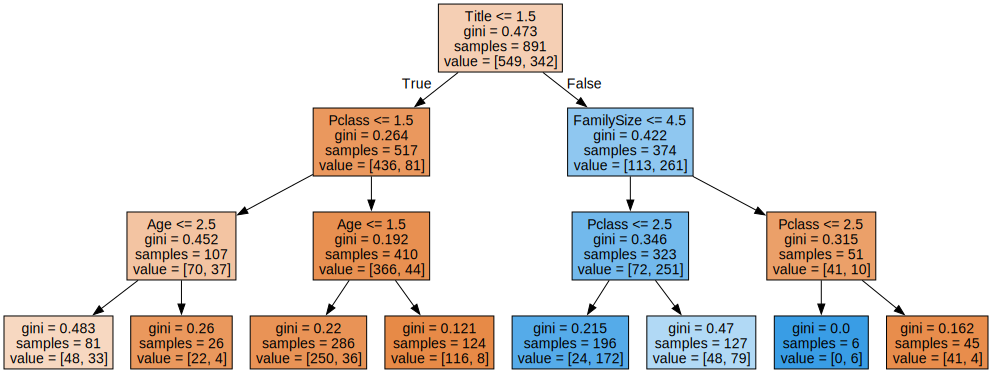

In [67]:
# 3. Plot the best classification tree

# 4. Compute and plot the tree with the optimal depth
indice_min_2 = np.argmin(tab_CrossEntropy_loss)
print(indice_min_2)

# Adjust regression tree with optimal depth
class_tree = DecisionTreeClassifier(max_depth=depths[indice_min_2])
class_tree.fit(X, y)
y_tree = class_tree.predict(X)

# Export the tree to "plot_tree.pdf"
plot_tree_2 = export_graphviz(class_tree, out_file=None, feature_names = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Title']
, filled=True) 
graph = Source(plot_tree_2) 
graph.render("class_tree")

# Plot the tree
graph

#### Inferred Rules

The decision tree generates classification rules based on the following features: 'Pclass', 'Sex', 'Age', 'FamilySize', 'Title'. Each node in the tree represents a decision based on one of these features, and each leaf of the tree represents a prediction (survival or death).

- **Pclass (Passenger Class)**:
  - The tree may split passengers based on their travel class, for example, by separating those in first class from others, assuming that first-class passengers have a higher probability of survival.

- **Sex (Gender)**:
  - A common rule in decision trees on this dataset is the distinction based on gender, often with higher survival among females.

- **Age**:
  - The tree can also create rules based on age, for example, identifying children with a higher probability of survival.

- **FamilySize**:
  - Family size can be another feature used, where passengers traveling alone or with large families may have different survival rates.

- **Title**:
  - The passenger's title (such as Mrs., Miss, etc.) can also influence the survival prediction.

#### Visualization and Interpretation

By visualizing the tree (exported in PDF format and displayed), one can trace decision paths from the root to the leaves to see how different combinations of features lead to a prediction of survival or death. Each path from the root to a leaf represents a series of decisions based on the features, reflecting a passenger "profile" with a specific outcome (survival or death).

## III - Multiple trees for binary classification

We consider another binary classification problem. The goal is to visualize the results of decision trees in nonlinear problems.

 this is x1 [[-0.18127316]
 [ 0.79310858]
 [-0.84073939]] 
 this is x2 [[-1.68873199]
 [ 0.66522524]
 [-2.06602639]] 
 this is x [[-0.18127316 -1.68873199]
 [ 0.79310858  0.66522524]
 [-0.84073939 -2.06602639]] 


Text(0.5, 1.0, 'Binary classification')

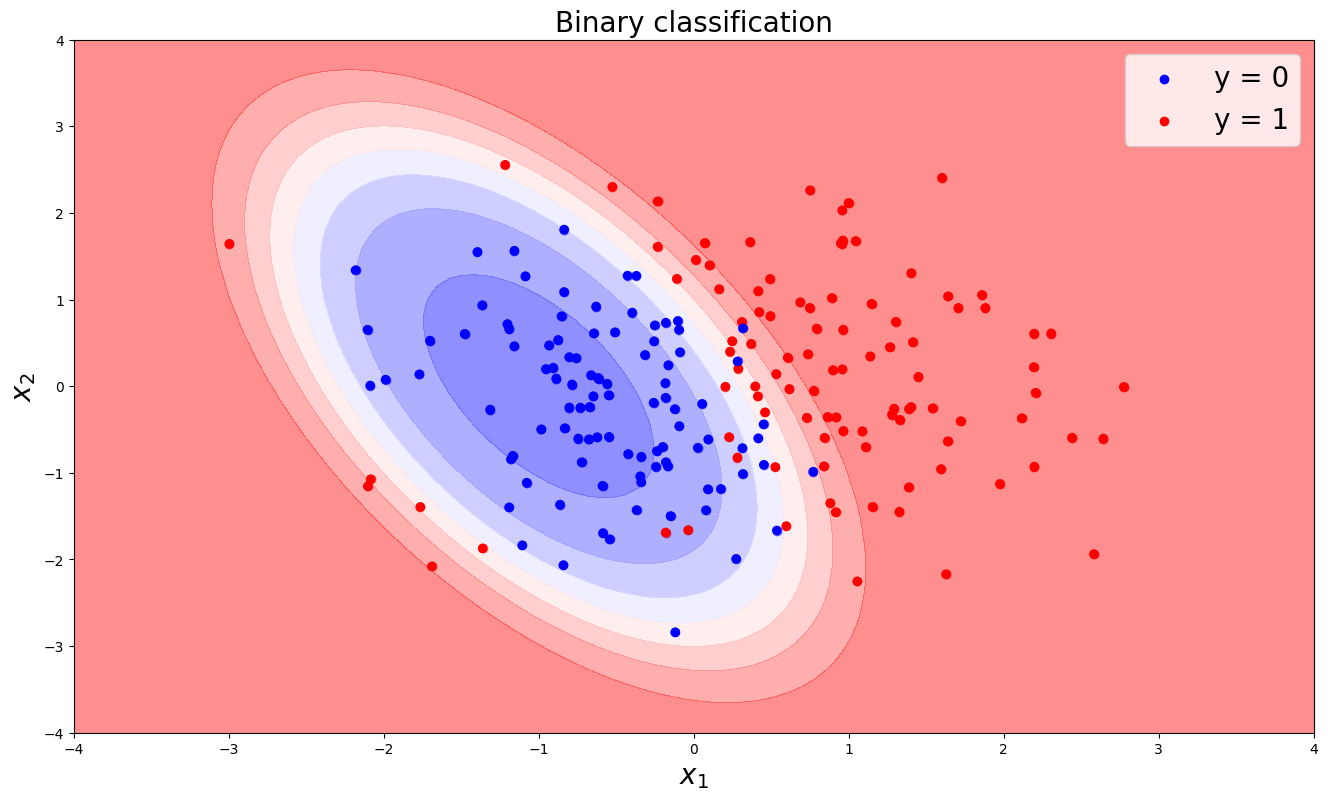

In [71]:
# 1. Generate the data

# Input variables
random.seed(1) # setting seed for reproducability
n = 200 # number of samples
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
x = np.hstack((x1, x2))

# output = f" this is x1 {x1[:3]} \n this is x2 {x2[:3]} \n this is x {x[:3]} "
# print(output)

# True parameters
w0 = -0.5
w1 = 1.5
w2 = 0.5
w11 = 0.75
w22 = 0.25
w12 = 0.5

# Noise
epsilon = np.random.randn(n, 1)/3

# Output variable
y_noise = np.tanh(w0 + w1*x1 + w2*x2 + w11*x1**2 + w22*x2**2 + w12*x1*x2 + epsilon)
y = (y_noise>0) # transform to binary data

# For visualization
X1, X2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
X = np.vstack((np.ravel(X1), np.ravel(X2))).T
Y = np.tanh(w0 + w1*X1 + w2*X2 + w11*X1**2 + w22*X2**2 + w12*X1*X2)

# Plot data
plt.scatter(x1[y==0], x2[y==0], c='b')
plt.scatter(x1[y==1], x2[y==1], c='r')
plt.contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.legend(['y = 0', 'y = 1'], prop={'size': 20})
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.title('Binary classification', size=20)

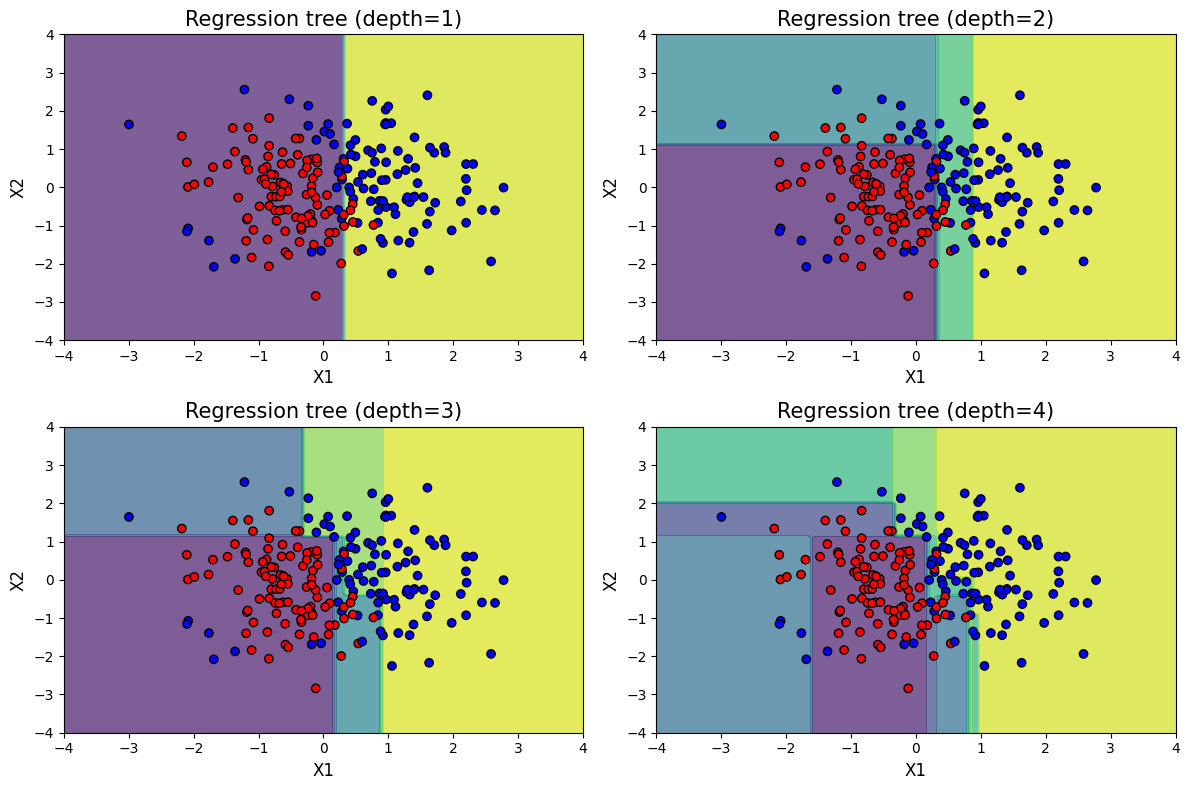

In [78]:
# Adjusting Decision Trees of Various Depths on the Original Dataset
class_tree_1 = DecisionTreeRegressor(max_depth=1)
class_tree_1.fit(x, y_noise.ravel()) 
Y_tree_1 = class_tree_1.predict(X) 

class_tree_2 = DecisionTreeRegressor(max_depth=2)
class_tree_2.fit(x, y_noise.ravel())
Y_tree_2 = class_tree_2.predict(X)

class_tree_3 = DecisionTreeRegressor(max_depth=3)
class_tree_3.fit(x, y_noise.ravel())
Y_tree_3 = class_tree_3.predict(X)

class_tree_4 = DecisionTreeRegressor(max_depth=4)
class_tree_4.fit(x, y_noise.ravel())
Y_tree_4 = class_tree_4.predict(X)

Y_tree_1_reshaped = Y_tree_1.reshape(X1.shape)
Y_tree_2_reshaped = Y_tree_2.reshape(X1.shape)
Y_tree_3_reshaped = Y_tree_3.reshape(X1.shape)
Y_tree_4_reshaped = Y_tree_4.reshape(X1.shape)

# Plot
plt.figure(figsize=(12, 8))

# Colors for points
colors = np.where(y.ravel(), 'b', 'r')

plt.subplot(2, 2, 1)
plt.contourf(X1, X2, Y_tree_1_reshaped, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')  # Ajout des données originales
plt.title('Regression tree (depth=1)', size=15)
plt.xlabel('X1', size=12)
plt.ylabel('X2', size=12)

plt.subplot(2, 2, 2)
plt.contourf(X1, X2, Y_tree_2_reshaped, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')  # Ajout des données originales
plt.title('Regression tree (depth=2)', size=15)
plt.xlabel('X1', size=12)
plt.ylabel('X2', size=12)

plt.subplot(2, 2, 3)
plt.contourf(X1, X2, Y_tree_3_reshaped, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')  # Ajout des données originales
plt.title('Regression tree (depth=3)', size=15)
plt.xlabel('X1', size=12)
plt.ylabel('X2', size=12)

plt.subplot(2, 2, 4)
plt.contourf(X1, X2, Y_tree_4_reshaped, alpha=0.7)
plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')  # Ajout des données originales
plt.title('Regression tree (depth=4)', size=15)
plt.xlabel('X1', size=12)
plt.ylabel('X2', size=12)

plt.tight_layout()
plt.show()

In [84]:
# Define the cross-validation procedure with random 10 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits=10, test_size=1/3, train_size=2/3)

# Create the models
rf_classifier = RandomForestClassifier(max_depth=3, random_state=42)
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), random_state=42)

# Calculate the median log loss for RandomForestClassifier
rf_loss = np.median(-cross_val_score(rf_classifier, x, y, scoring='neg_log_loss', cv=cvp))

# Calculate the median log loss for AdaBoostClassifier
ada_loss = np.median(-cross_val_score(ada_classifier, x, y, scoring='neg_log_loss', cv=cvp))

# Display the log losses
print("Random Forest Median Log Loss:", rf_loss)
print("AdaBoost Median Log Loss:", ada_loss)

Random Forest Median Log Loss: 0.3000815434008903
AdaBoost Median Log Loss: 0.8086168935991903
